$$6532142421\ Pupipat\ Singkhorn$$

#  **<<< Only Problem 1, 4 and 9 will be graded >>>**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

import numpy as np
import IPython.display as ipd
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

## Problem 1
Sketch the following signals
1.
$x(t) = \sin \left (\frac{\pi}{4}t + 20^\circ \right)$


2.
$x(t) = \begin{cases}t+2 , t \leq -2 \\ 0 , -2 \leq t \leq 2\\ t-2 , t \geq 2 \end{cases}$

3.
$x(t) = 2e^{-t}, 0 \leq t < 1$ and $ x(t+1) = x(t) $ for all $t$

4.
$x(t) = u(t) + 5u(t-1) -2u(t-2)$

5.
$x(t) = r(t) - r(t-1) - u(t-2)$




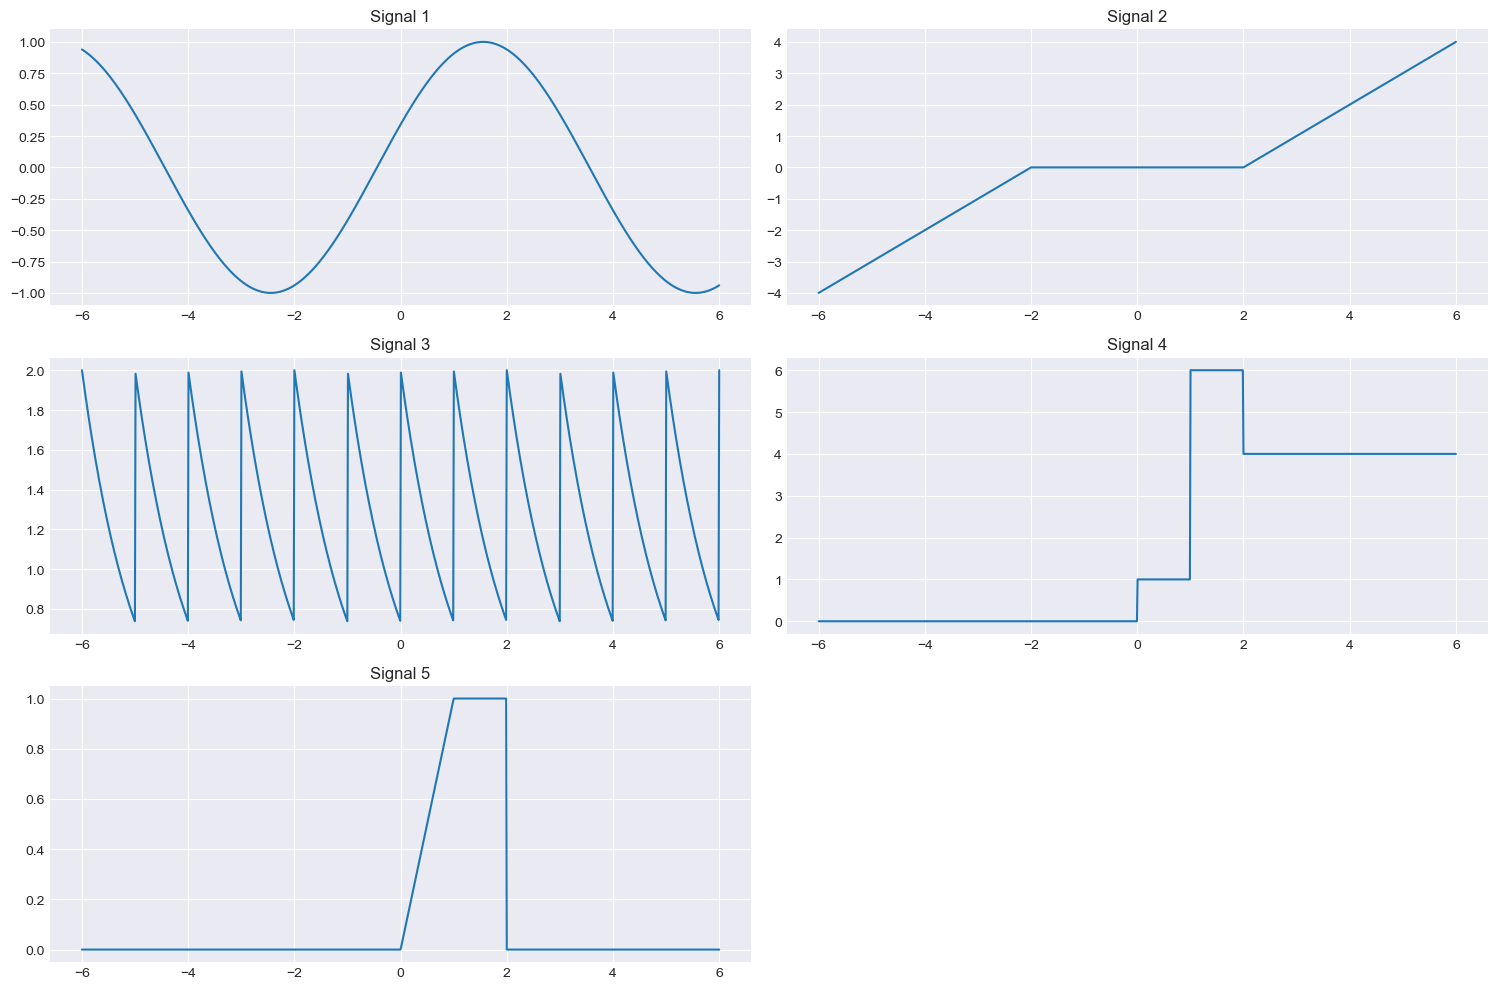

In [2]:
# 1.
def x1(t):
    return np.sin(np.pi/4 * t + np.pi/9)

# 2.
def x2(t):
    if t < -2: return t+2
    elif (-2 <= t <= 2): return 0
    else: return t-2

# 3.
def x3(t):
    return 2 * np.exp(-np.mod(t, 1))

# 4.
def u(t):
    return np.heaviside(t, 1)

# 5.
def r(t):
    return t * np.heaviside(t, 1)


t = np.linspace(-6, 6, 1000)

x_1 = x1(t)
x_2 = np.array([x2(i) for i in t])
x_3 = x3(t)
x_4 = u(t) + 5*u(t-1) - 2*u(t-2)
x_5 = r(t) - r(t-1) - u(t-2)

# Plot
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(t, x_1)
plt.grid(True)
plt.title('Signal 1')

plt.subplot(3, 2, 2)
plt.plot(t, x_2)
plt.grid(True)
plt.title('Signal 2')

plt.subplot(3, 2, 3)
plt.plot(t, x_3)
plt.grid(True)
plt.title('Signal 3')

plt.subplot(3, 2, 4)
plt.plot(t, x_4)
plt.grid(True)
plt.title('Signal 4')

plt.subplot(3, 2, 5)
plt.plot(t, x_5)
plt.grid(True)
plt.title('Signal 5')

plt.tight_layout()
plt.show()

## Problem 2
Determine whether each of following signals is periodic, and if so, find its period.
1.
$x(t) = \sin \left( \frac{\pi}{3}t \right) + \cos \left( \frac{8\pi}{3}t \right)$
2.
$x(t) = \exp \left  (j\frac{7\pi}{6}t \right) +  \exp \left( j\frac{5\pi}{6}t \right) $

3.
$x(t) = \exp \left( j\frac{7\pi}{6}t \right) +  \exp \left(\frac{5\pi}{6}t \right) $


## Problem 3
Determine whether the following signals are power or energy signals or neither. Justify your answers

1. $x(t) = A\sin( t ), -\infty < t < \infty$
2. $x(t) = A(u(t-a) - u(t+a)), \, a>0 $
4. $x(t) = \exp(-at)u(t), \,  a>0 $
7. $x(t) = A\exp(bt)u(t), \, b>0$



## Problem 4
For the discrete time signal x[n] shown in Figure below, sketch each of the following

1. $x[2-n] $
2. $x[3n-4] $
3. $x\left[ \frac{2}{3}n+1 \right]  $
4. $x\left[-\frac{n+8}{4} \right] $
5. $x[n^3] $
8. $x[2-n] +x[3n-4] $

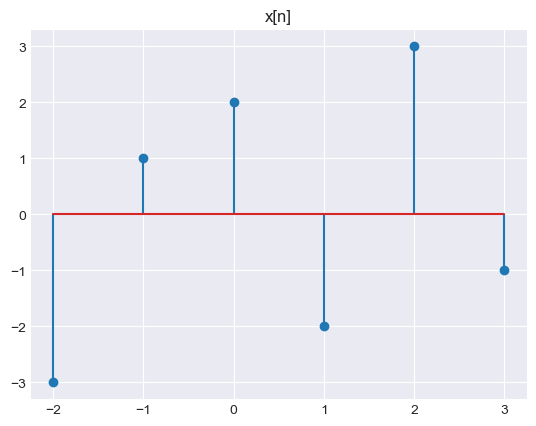

In [3]:
# x[n]
t = np.arange(-2,4)
x_n = np.array([-3,1,2,-2,3,-1])
plt.stem(t, x_n)
plt.title('x[n]')
plt.show()

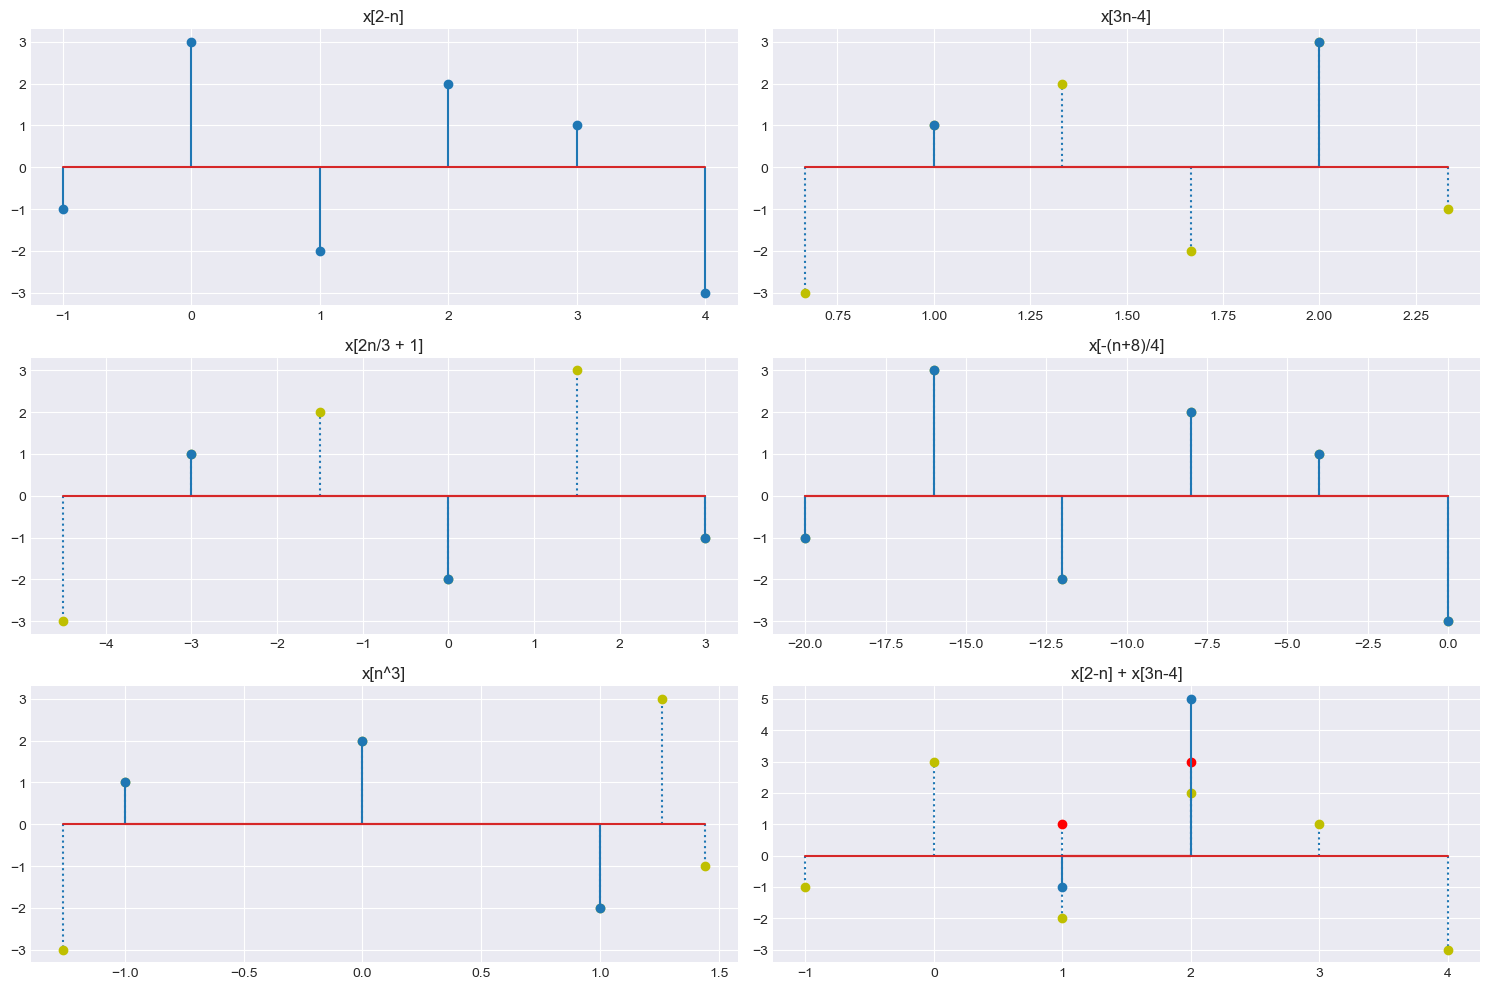

In [4]:
# x[n]
base_x = np.array([-2,-1,0,1,2,3])
base_y = np.array([-3,1,2,-2,3,-1])

def filterInt(arr_x, arr_y):
    mask = np.where(arr_x % 1 == 0, True, False)
    return arr_x[mask], arr_y[mask]

# Plot
plt.figure(figsize=(15, 10)) # 3 rows, 2 columns

plt.subplot(3, 2, 1)
new_x, new_y = filterInt(-(base_x-2), base_y)
plt.stem(new_x, new_y)
plt.grid(True)
plt.title('x[2-n]')

plt.subplot(3, 2, 2)
plt.stem((base_x+4)/3, base_y, linefmt=':', markerfmt='yo')
new_x, new_y = filterInt((base_x+4)/3, base_y)
plt.stem(new_x, new_y)
plt.grid(True)
plt.title('x[3n-4]')

plt.subplot(3, 2, 3)
plt.stem((base_x-1)*3/2, base_y, linefmt=':', markerfmt='yo')
new_x, new_y = filterInt((base_x-1)*3/2, base_y)
plt.stem(new_x, new_y)
plt.grid(True)
plt.title('x[2n/3 + 1]')

plt.subplot(3, 2, 4)
plt.stem((-4*base_x)-8, base_y, linefmt=':', markerfmt='yo')
new_x, new_y = filterInt((-4*base_x)-8, base_y)
plt.stem(new_x, new_y)
plt.grid(True)
plt.title('x[-(n+8)/4]')

plt.subplot(3, 2, 5)
plt.stem(np.cbrt(base_x), base_y, linefmt=':', markerfmt='yo')
new_x, new_y = filterInt(np.cbrt(base_x), base_y)
plt.stem(new_x, new_y)
plt.grid(True)
plt.title('x[n^3]')

plt.subplot(3, 2, 6)
x1, y1 = filterInt(-(base_x - 2), base_y)
x2, y2 = filterInt((base_x + 4) / 3, base_y)
plt.stem(x1, y1, linefmt=':', markerfmt='yo')
plt.stem(x2, y2, linefmt=':', markerfmt='ro')
new_x = np.intersect1d(x1, x2)
new_y = [y1[np.where(x1 == i)[0][0]] + y2[np.where(x2 == i)[0][0]] for i in new_x]
plt.stem(new_x, new_y)
plt.grid(True)
plt.title('x[2-n] + x[3n-4]')

plt.tight_layout()
plt.show()

## Problem 5
Determine whether each of following signals is periodic, and if so, find its period.

1.
$x[n] = \sin \left( \frac{\pi n}{4} + \frac{\pi}{8}\right)$

2.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \sin\left( \frac{\pi}{3}n\right)$

3.
$x[n] = \sin \left( \frac{3\pi n}{4}\right)\sin\left( \frac{\pi}{3}n\right)$

4.
$x[n] = \exp \left( \frac{6\pi}{5}n \right)$

5.
$x[n] = \exp \left( j\frac{5\pi}{6}n \right)$

6.
$x[n] =  \sum_{m=-\infty}^{\infty} \left[ \delta[n-2m] + 2\delta[n-3m] \right]$

<!-- 1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \cos \left( \frac{\pi}{3} n \right)$ -->

 ## Problem 6

 [python] Signal transformations :
 Study the sawtooth function in the figure below. Apply reflection, scaling, shifting operations to the signal and plot the transformed signals compared with the original sawtooth signal.  


In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))
# plt.show()

In [7]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# scaling factor = 3 and 1/3
## TODO : writing code for time scaling

In [8]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# shifting t to the left and right 0.05 units

## TODO : writing code for time shifting

In [9]:
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

## TODO : writing code for time Reflection


  ## Problem 7
 [python] Elementary signals: study  the ramp signal plotted in the example below. \\
TODO : plot these signals

1.   Unit step function
2.   Unit impulse function



In [10]:
# t = np.linspace(-1, 1, 500)
# ramp_t = t.copy()
# ramp_t[ramp_t < 0 ] = 0
# plt.plot(t, ramp_t)
# plt.show()

In [11]:
## TODO : writing code for plotting unit step function

In [12]:
## TODO : writing code for plotting unit impulse function

## Problem 8
Express the signal that shown in Figure below using Unit-ramp functions



<a href="https://ibb.co/pXt8t2Y"><img src="https://i.ibb.co/DKxyx40/Screen-Shot-2564-08-11-at-15-16-52.png" alt="Screen-Shot-2564-08-11-at-15-16-52" border="0"></a>



## Problem 9

Evaluate the following integrals

**Answer**:

1. $\int_{-\infty}^{\infty} \left( \frac{2}{3}t-\frac{3}{2} \right) \delta(t-1) \,dt = -5/6$

2. $\int_{-\infty}^{\infty} (t-1) \delta \left(\frac{2}{3}t- \frac{3}{2} \right) \,dt = 15/8$

3. $\int_{-3}^{-2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt = 0$

1. $\int_{-3}^{2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt = e^{-1/2} + \sin(\pi) = \frac{1}{\sqrt{e}}$